## Title
Predicting Tennis Player Rankings Based on Player Statistics

## Introduction

Tennis, a globally popular sport, has seen numerous players rise and fall in the rankings. The rankings are determined by several factors, primarily by a player's performance in tournaments. However, there might be underlying features or characteristics of top-ranked players that could potentially predict their rankings. By using the "Player Stats for Top 500 Players" dataset, our goal is to predict a tennis player's rank based on various player statistics.

### Predictive Question:
Can we predict a tennis player's current rank based on their age, playing style, prize money earned, favorite surface, number of seasons played, current Elo rank, number of titles won, and the number of weeks they've been at No. 1?

### Dataset Description:
The dataset "Player Stats for Top 500 Players" contains a comprehensive list of variables related to the top tennis players. These variables range from personal details, professional statistics, and social media presence.is

**Reading the Dataset from Web into R**:
We would demonstrate reading the dataset directly from its web source into R, probably using functions like `read.csv()` or relevant packages like `readr`.

**Data Wrangling and Cleaning**:
Ensure that the dataset is in a tidy format. Remove any rows with missing data for the variables/columns we plan to use. Convert data types if necessary.

**Summary Table**:
A table showing:
- Number of observations for each favorite surface (e.g., Grass, Clay, Hard)
- Mean prize money earned by players
- Average age of players
- Average number of seasons played by players
- Mean of current Elo rank

**Visualization**:
A scatter plot comparing the "Prize Money" against the "Current Rank", to visualize if there's any trend between earnings and rank.

## Methods

We'll use a regression model, probably a linear regression if our exploratory data analysis suggests a linear relationship between the features and the target variable (Current Rank).

**Variables/Columns to be used**:
1. Age
2. Prize Money
3. Favorite Surface
4. Seasons
5. Current Elo Rank
6. Titles
7. Weeks at No. 1

**Visualizing the Results**:
We will plot the predicted ranks against the actual ranks to visualize the accuracy of our model. Additionally, a residual plot can be plotted to understand the differences between actual and predicted values.

## Expected Outcomes and Significance

**Expected Findings**:
We expect to find a relationship between the player's statistics (like prize money, number of titles, etc.) and their rankings. Players with higher earnings, more titles, and those who have spent more weeks at No. 1 might have better rankings.

**Impact**:
Understanding these relationships can provide insights into what factors contribute most to a player's ranking, which can be useful for players, coaches, and analysts.

**Future Questions**:
- How does the player's favorite surface impact their performance in grand slams specific to those surfaces?
- Does the age of turning pro correlate with a player's success in their career?
- How has the influence of social media presence (like Facebook, Twitter followers) affected a player's popularity or endorsements, if at all?

In [1]:
#Import library 
library(tidyverse)
library(repr)
library(readxl)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Commentted out the following code to prevent duplicate downloads
# url <- "https://drive.google.com/uc?export=download&id=19AaN0S9kClY0hyl3Xtk_4PDTVg7d9uL3"
# download.file(url, "data/raw_housing.csv")

In [3]:
#read and peek the raw data to make sure we successfully loaded the data
raw_housing <- read_csv("data/raw_housing.csv")
head(raw_housing)

Rows: 20640 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ocean_proximity
dbl (9): longitude, latitude, housing_median_age, total_rooms, total_bedroom...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [11]:
# As ocean_proximity is a categorical value, in order to use this feature we perform Ordinal Encoding as categories have a rank. 
#Create the mapping based on dataset
proximity_ranking <- c("INLAND" = 1, "<1H OCEAN" = 2, "NEAR OCEAN" = 3, "NEAR BAY" = 4, "ISLAND" = 5)

# Apply the mapping to the ocean_proximity column to create the encoded column
raw_housing$ocean_proximity_numeric  <- as.integer(proximity_ranking[raw_housing$ocean_proximity])
raw_housing

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,raw_housing,ocean_proximity_numeric
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,4,4
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,4,4
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,4,4
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-121.22,39.43,17,2254,485,1007,433,1.7000,92300,INLAND,1,1
-121.32,39.43,18,1860,409,741,349,1.8672,84700,INLAND,1,1
-121.24,39.37,16,2785,616,1387,530,2.3886,89400,INLAND,1,1


In [12]:
#select the required data
select_housing <- select(raw_housing,housing_median_age,total_rooms,median_income,median_house_value,median_house_value,ocean_proximity_numeric)

In [13]:
# split the test and trainning data
set.seed(3456) 
housing_split <- initial_split(select_housing, prop = 0.75,strata = ocean_proximity_numeric)  
housing_train <- training(housing_split)   
housing_test <- testing(housing_split)

In [14]:
#preview the trainning data
head(housing_train)

housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity_numeric
<dbl>,<dbl>,<dbl>,<dbl>,<int>
46,1280,5.1406,315600,1
18,7397,6.4994,323000,1
23,2234,7.3330,337200,1
25,2244,6.4524,296900,1
20,2948,6.0604,247900,1
19,2034,6.5285,300400,1


In [15]:
#summarize the training data in one table
summary(housing_train)

 housing_median_age  total_rooms    median_income     median_house_value
 Min.   : 1.00      Min.   :    2   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:18.00      1st Qu.: 1444   1st Qu.: 2.5682   1st Qu.:119200    
 Median :29.00      Median : 2131   Median : 3.5488   Median :179700    
 Mean   :28.56      Mean   : 2642   Mean   : 3.8835   Mean   :207206    
 3rd Qu.:37.00      3rd Qu.: 3162   3rd Qu.: 4.7791   3rd Qu.:265850    
 Max.   :52.00      Max.   :39320   Max.   :15.0001   Max.   :500001    
 ocean_proximity_numeric
 Min.   :1.000          
 1st Qu.:1.000          
 Median :2.000          
 Mean   :2.034          
 3rd Qu.:2.000          
 Max.   :5.000          

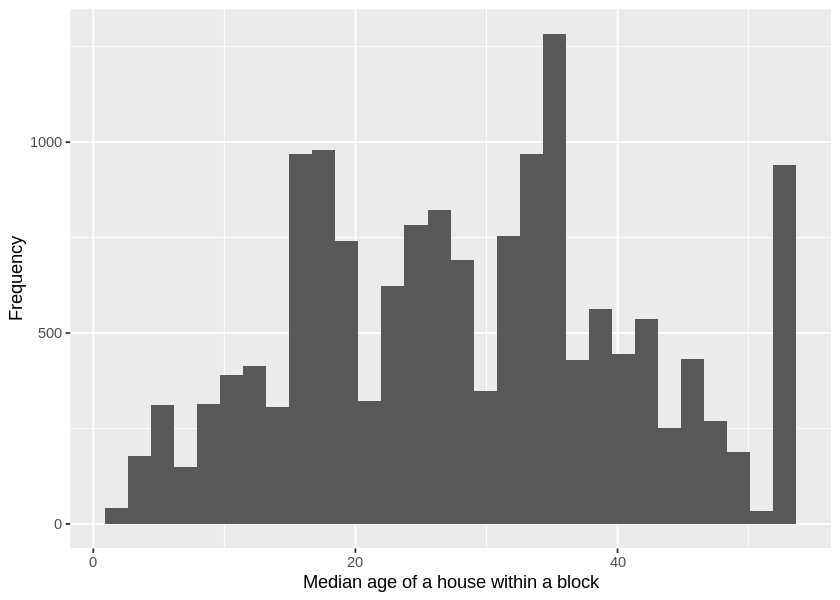

In [16]:
options(repr.plot.width = 7, repr.plot.height = 5)
print(
    ggplot(housing_train, aes(housing_median_age)) + 
        geom_histogram(bins = 30) + 
        labs(x = "Median age of a house within a block",y = "Frequency")
)

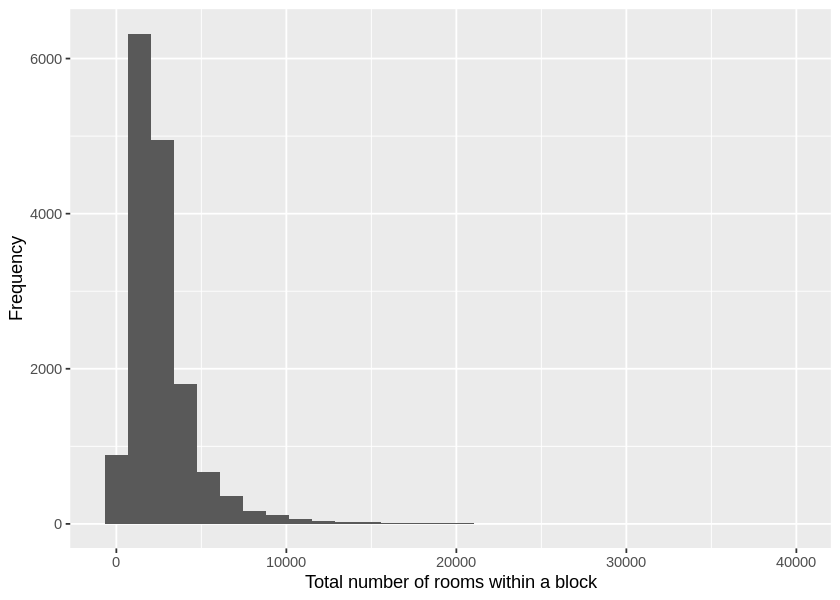

In [17]:
options(repr.plot.width = 7, repr.plot.height = 5)
print(
    ggplot(housing_train, aes(total_rooms)) + 
        geom_histogram(bins = 30) + 
        labs(x = "Total number of rooms within a block",y = "Frequency")
)

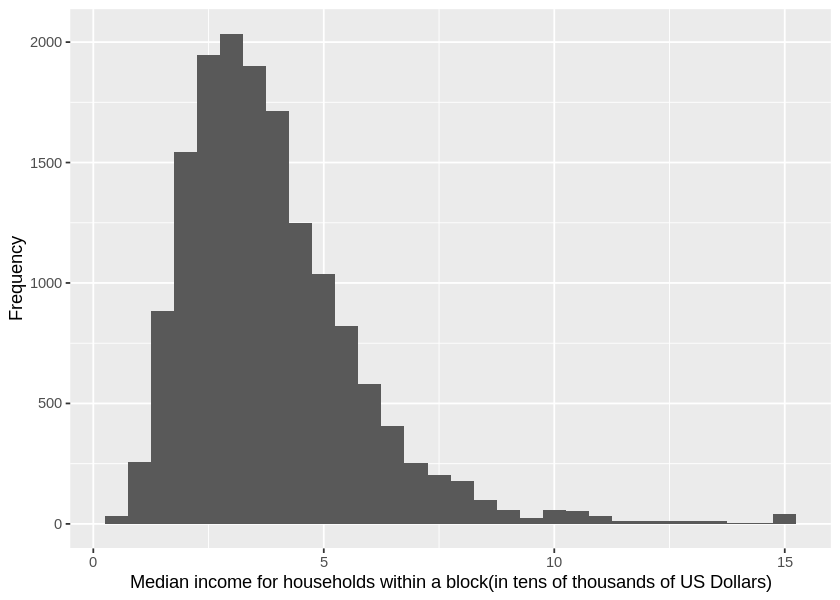

In [18]:
options(repr.plot.width = 7, repr.plot.height = 5)
print(
    ggplot(housing_train, aes(median_income)) + 
        geom_histogram(bins = 30) + 
        labs(x = "Median income for households within a block(in tens of thousands of US Dollars)",y = "Frequency")
)

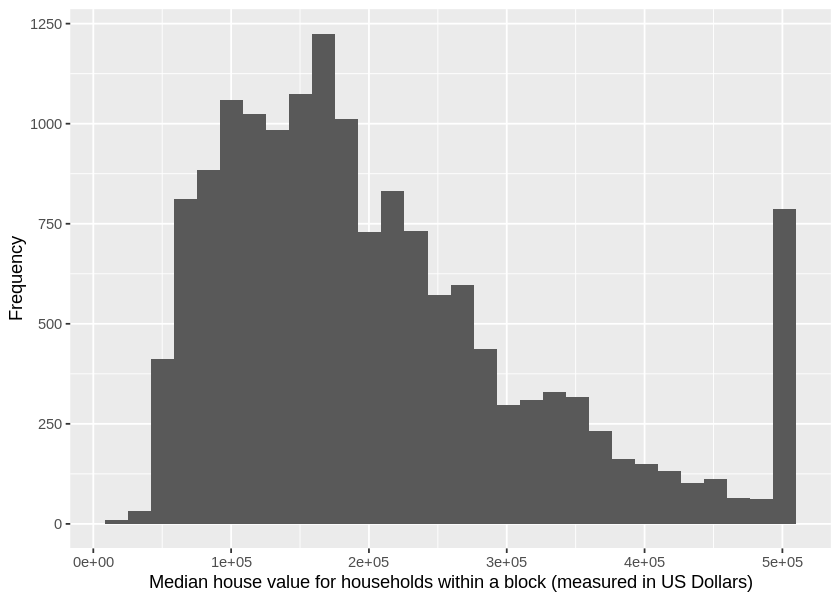

In [19]:
options(repr.plot.width = 7, repr.plot.height = 5)
print(
    ggplot(housing_train, aes(median_house_value)) + 
        geom_histogram(bins = 30) + 
        labs(x = "Median house value for households within a block (measured in US Dollars)",y = "Frequency")
)

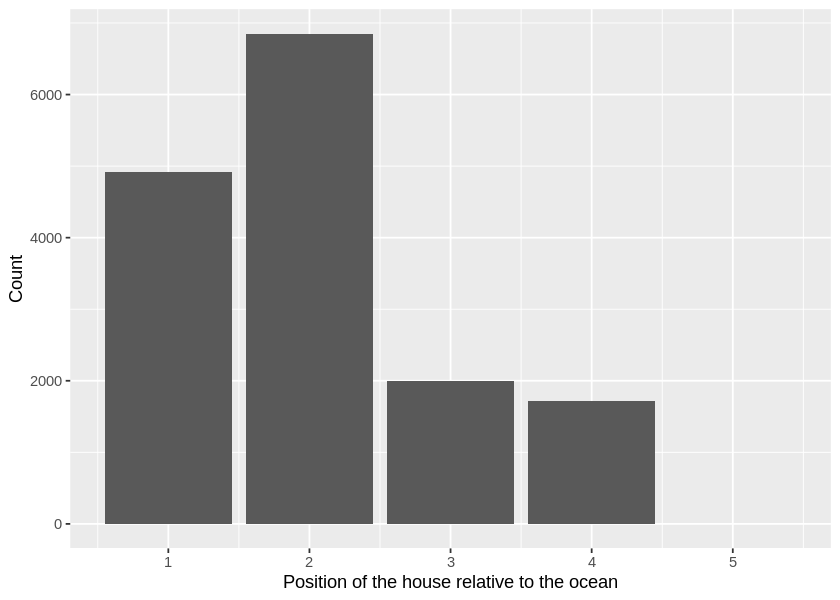

In [23]:
options(repr.plot.width = 7, repr.plot.height = 5)
print(ggplot(housing_train,aes(x=ocean_proximity_numeric)) + 
    geom_bar() + 
    labs(x = "Position of the house relative to the ocean",y = "Count"))

In [27]:
housing_recipe <- recipe(median_house_value ~., data = housing_train) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())

housing_scaled <- housing_recipe |>  
                           prep() |> 
                           bake(housing_train)

In [28]:
housing_scaled

housing_median_age,total_rooms,median_income,ocean_proximity_numeric,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.3873057,-0.6216278,0.6597315,-1.095243,315600
-0.8395808,2.1704033,1.3728275,-1.095243,323000
-0.4419225,-0.1861859,1.8102994,-1.095243,337200
⋮,⋮,⋮,⋮,⋮
-0.6805175,0.3031156,1.0049439,2.082701,297600
-1.1577075,0.4975581,-0.6915194,2.082701,208000
-1.6348974,1.1183138,-0.1684528,2.082701,213200
